<a href="https://colab.research.google.com/github/theorignalmapdcodex/aipi590_i-4_et2/blob/main/notebooks/pdp%2Bice%2Bale_plot_interpretation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

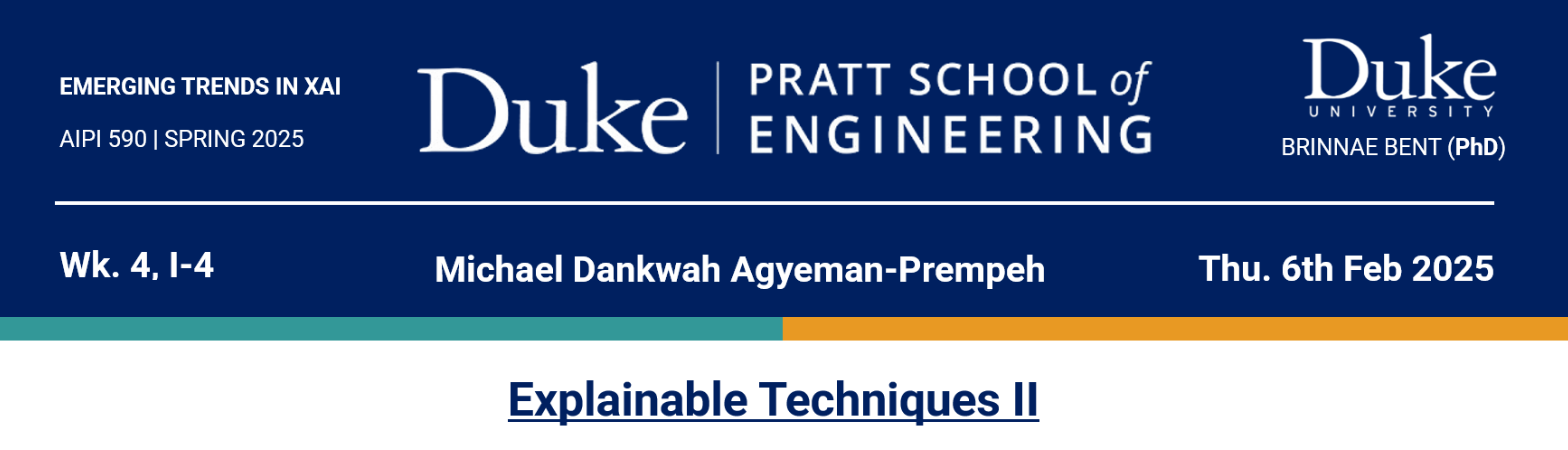

In [239]:
# Connecting my Google drive to Colab and importing dataset just for running; Include in Colab after work completion (mounting is unique per device running this code)
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


>#### 🔗 **1. GitHub Link:**
- Click [here](https://github.com/theorignalmapdcodex/aipi590_i-4_et2/blob/main/notebooks/pdp%2Bice%2Bale_plot_interpretation.ipynb) to access the *GitHub repository .ipynb* file for this assignment.

## 🥅 **Project Goal:**
### *The goal of this assignment is to gain a deep understanding of explainable AI (XAI) techniques, specifically focusing on Partial Dependence Plots (PDP), Individual Conditional Expectation (ICE) plots, and Accumulated Local Effects (ALE) plots.*

<br>

--------------------------------------------------------------------------------

In [240]:
# To ignore warnings for code output to look clean
import warnings
warnings.filterwarnings("ignore")

In [241]:
# import os

# # Remove Colab default sample_data
# !rm -r ./sample_data

# # Clone GitHub files to colab workspace
# repo_name = "aipi590_i-4_et2"
# git_path = 'https://github.com/theorignalmapdcodex/aipi590_i-4_et2.git' # Change to your path
# !git clone "{git_path}"

# # Change working directory to location of notebook
# notebook_dir = 'notebooks'
# path_to_notebook = os.path.join(repo_name,notebook_dir)
# %cd "{path_to_notebook}"
# %ls

# import os

# # Remove Colab default sample_data if it exists
# if os.path.exists("./sample_data"):
#     !rm -r ./sample_data

# # Clone GitHub files to colab workspace
# repo_name = f'{aipi590_i-4_et2}'

# # Check if the repo already exists
# if not os.path.exists("/content/" + repo_name):
#     git_path = f'{https://github.com/theorignalmapdcodex/aipi590_i-4_et2.git}'
#     !git clone "{git_path}"
# else:
#     print(f"{aipi590_i-4_et2} already exists.")

# # Change working directory to location of notebook
# path_to_notebook = os.path.join("/content/" + aipi590_i-4_et2)
# %cd "{path_to_notebook}"
# %ls

# #Install the requirements for this package
# !pip install -r requirements.txt

## 📚 **I. Libraries & Packages Installation**

In [242]:
# For the purposes of working on Colab independently
!pip install numpy==1.25.2 pandas==2.0.3 scikit-learn==1.2.2 shap==0.45.1
!pip install git+https://github.com/MaximeJumelle/ALEPython.git@dev#egg=alepython

  Cloning https://github.com/MaximeJumelle/ALEPython.git (to revision dev) to /tmp/pip-install-oryb0ixt/alepython_92601ab9c89140f2baa36def1075d7f6
  Running command git clone --filter=blob:none --quiet https://github.com/MaximeJumelle/ALEPython.git /tmp/pip-install-oryb0ixt/alepython_92601ab9c89140f2baa36def1075d7f6
  Resolved https://github.com/MaximeJumelle/ALEPython.git to commit 286350ab674980a32270db2a0b5ccca1380312a7
  Preparing metadata (setup.py) ... done


In [243]:
# #Install the requirements for this package and included in requirements.txt file
# !pip install -r requirements.txt

In [244]:
# General packages for EDA, Plotting etc.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Packages for Machine Learning purposes
import xgboost
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Packages for evaluating my choice of model
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

# Packages from last assignment
import shap

# Packages from XAI course
import shap
from alepython import ale_plot
from sklearn.inspection import PartialDependenceDisplay
from sklearn.inspection import permutation_importance

## ⚙️ **III. Assessing, Cleaning and Exploratory Data Analysis on Chosen Dataset**

In [245]:
# i. Sourcing the Bull City streaming data
# Bull City Streaming Data - The data presented examines three treatments of tile artwork for the video and short streaming service, “Bull City Streaming.”
# https://drive.google.com/file/d/1RQNT9uWaEwn0rxkRPVVcVPM_S2MLgJtA/view

bcs_data = pd.read_csv('/content/drive/MyDrive/MEngDTI@Duke/DTK530/I-5/ABtest&CAdata/I-5_Data_v2.csv')

# No of rows
bcs_data_rows = bcs_data.shape[0]
# No of columns
bcs_data_columns = bcs_data.shape[1]
# Get the values
print(bcs_data_rows,'\n',bcs_data_columns)

# Showing first 10 rows of table
bcs_data.info()
bcs_data.describe()
bcs_data.head(10)

21000 
 10
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   User ID                21000 non-null  int64  
 1   Geographical Region    21000 non-null  object 
 2   Treatment              21000 non-null  object 
 3   Engagement Time (min)  21000 non-null  int64  
 4   Views                  21000 non-null  int64  
 5   Likes                  21000 non-null  int64  
 6   Shares                 21000 non-null  int64  
 7   Completion Rate (%)    8487 non-null   float64
 8   Conversion             21000 non-null  bool   
 9   Date                   21000 non-null  object 
dtypes: bool(1), float64(1), int64(5), object(3)
memory usage: 1.5+ MB


,User ID,Geographical Region,Treatment,Engagement Time (min),Views,Likes,Shares,Completion Rate (%),Conversion,Date
0,162320,Europe,B,43,8,5,1,NaN,False,7/2/2019
1,162320,Europe,B,49,8,3,2,NaN,False,7/2/2019
2,57447,Africa,Control,19,1,0,0,NaN,False,7/2/2019
3,57447,Africa,Control,129,2,2,3,28.287122,True,7/3/2019
4,57447,Africa,Control,39,5,5,3,NaN,False,7/6/2019
5,57447,Africa,Control,191,9,6,0,2.812509,True,7/4/2019
6,57447,Africa,Control,171,6,0,1,93.756664,True,7/6/2019
7,57447,Africa,Control,160,3,1,0,NaN,False,7/4/2019
8,57447,Africa,Control,128,7,7,3,99.705033,True,7/2/2019
9,57447,Africa,Control,199,6,6,3,44.729176,True,7/3/2019


In [246]:
# ii - Task 1: Dropping the Treatment and UserID columns as I won't be performing any form of Cohort Analyis and even the Geographical Region and Date columns as working with fully numerical values would be ideal
bcs_data = bcs_data.drop(columns=['User ID','Treatment', 'Geographical Region', 'Date'])

In [247]:
# ii - Task 2: Checking for null values for all columns
print(bcs_data.isnull().sum())

Engagement Time (min)        0
Views                        0
Likes                        0
Shares                       0
Completion Rate (%)      12513
Conversion                   0
dtype: int64


From the dataframe description and checking for null value function above, we see that `Completion Rate (%)`, a very important feature which will be included in the x variables for buidling my model of choice, has a lot of `null values`(12,513) and hence how we treat this column is crucial.

From my analysis, it will be better if I <mark>fill missing values with the mean or median of the existing values (they are numerical values)</mark> rather than dropping the rows as I believe it contributes to the prediction of the `Conversion` feature (the feature I will select as my target (y) variable).

In [248]:
# ii - Task 3: Filling the empty table cells with mean values in the Completion Rate (%) column of bcs_data with mean values with the aim of protecting the power of our model yet to be built

bcs_data['Completion Rate (%)'].fillna(bcs_data['Completion Rate (%)'].mean(), inplace=True)                        #----> Search via Gemini AI @ 8:19pm

In [249]:
# Showing first 10 rows of table again
bcs_data.info()
bcs_data.describe()
bcs_data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Engagement Time (min)  21000 non-null  int64  
 1   Views                  21000 non-null  int64  
 2   Likes                  21000 non-null  int64  
 3   Shares                 21000 non-null  int64  
 4   Completion Rate (%)    21000 non-null  float64
 5   Conversion             21000 non-null  bool   
dtypes: bool(1), float64(1), int64(4)
memory usage: 840.9 KB


,Engagement Time (min),Views,Likes,Shares,Completion Rate (%),Conversion
0,43,8,5,1,49.816287,False
1,49,8,3,2,49.816287,False
2,19,1,0,0,49.816287,False
3,129,2,2,3,28.287122,True
4,39,5,5,3,49.816287,False
5,191,9,6,0,2.812509,True
6,171,6,0,1,93.756664,True
7,160,3,1,0,49.816287,False
8,128,7,7,3,99.705033,True
9,199,6,6,3,44.729176,True


There are no `null` values in our dataframe. Yay!

## 💻 **IV. Correlation Between Features/Variables**

Before we build the model and even start plotting, we need to:
- Check for the correlation between features (two see if two things are connected, that is, as one ⬆️ or ⬇️, what happens to the other). The `Conversion` column is already in boolean format so our correlation matrix will be easy to build (no need for one-hot encoding)
- Select a dependent (target) variable (y) and the rest as independent variables (x)

**a. To check for correlation between features, we can use a correlation matrix**

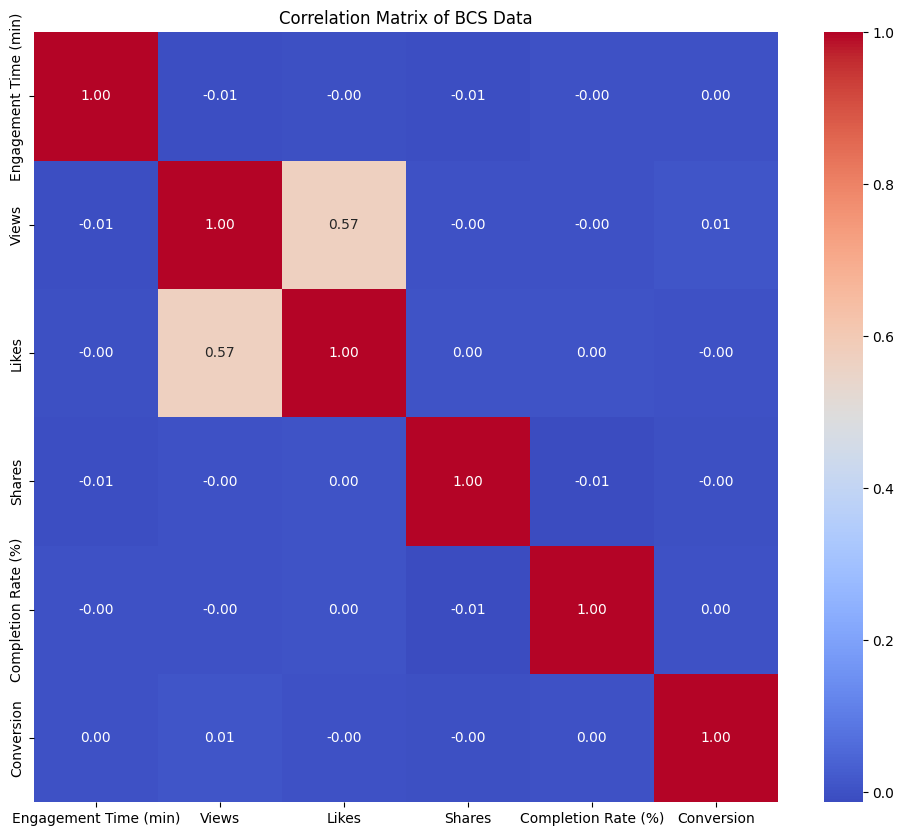

In [250]:
# Creating and visualizing the correlation matrix
correlation_matrix = bcs_data.corr()                                                    #----> Search via Gemini AI @ 8:35pm

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of BCS Data')

plt.show()

In [251]:
# Identifying highly correlated elements by code                                                  #----> Search via Gemini AI @ 9:19pm but refined by personally introducing 'if clause'
# Threshold for considering features as highly correlated
threshold = 0.8

# Finding pairs of features with correlation above the threshold
corr_pairs = correlation_matrix.abs().unstack().sort_values(kind="quicksort", ascending=False)

highly_correlated = corr_pairs[(corr_pairs < 1) & (corr_pairs >= threshold)]

if highly_correlated.empty:
    print("No highly correlated features found.")
else:
    print("Highly correlated feature pairs:")
    print(highly_correlated)

No highly correlated features found.


**Interpretation:**
- Since from the analysis above, we have no highly correlated features, it basically means the features are not highly redundant and might be contributing something unique.

It would be nice to see how important these features are as we proceed to model training.

**b. Selecting my target variable, `Conversion`**

Interpretation:
- Text goes here

## ✨ **V. Training and Building the Model of Choice**

In [252]:
# Splitting bcs_data into X and Y for model training
target_feature = 'Conversion'

Y = bcs_data[target_feature]
X = bcs_data.drop(target_feature, axis=1)

print(X.head())
print(Y.head())

   Engagement Time (min)  Views  Likes  Shares  Completion Rate (%)
0                     43      8      5       1            49.816287
1                     49      8      3       2            49.816287
2                     19      1      0       0            49.816287
3                    129      2      2       3            28.287122
4                     39      5      5       3            49.816287
0    False
1    False
2    False
3     True
4    False
Name: Conversion, dtype: bool


> ## **a. i.) <mark>Viz #1</mark>: Text Plot of SHAP values from Text 1**

In [253]:
# viz1_shap_values = get_shapvalues_from_text(firsttext_to_analyse)
# viz1_shap_values

In [254]:
# predict_and_visualize(viz1_shap_values)

> ## **a. ii.) Interpretation of <mark>Viz #1</mark>**

In [255]:
# # Identifying the shape of our first text via SHAP values representation
# viz1_shap_values.shape

This means that the shape of the SHAP values of the 1st text is (1, 8, 20) — 1 instance, 8 tokens, 20 output dimensions.

#### Inputs as tokens (8 of them)



```
['An', ' immigrant', ' was', ' speaking', ' in', ' the', ' meeting',' when']
```



In [256]:
# tokens_firsttext = ['An', ' immigrant', ' was', ' speaking', ' in', ' the', ' meeting',' when']

#### Outputs



```
he was shot in the head . The shooting occurred at about 9 : 30 p . m
```



Let's extract the token SHAP values to see their contribution power to the model

In [257]:
## Listing out all the tokens of the first text

# viz1_shap_values.values[0][1]
# viz1_shap_values.values[0][2]
# viz1_shap_values.values[0][3]
# viz1_shap_values.values[0][4]
# viz1_shap_values.values[0][5]
# viz1_shap_values.values[0][6]
# viz1_shap_values.values[0][7]
# viz1_shap_values.values[0][8]

I will develop a function to help print the shap values of each data element or token based on the intution above

In [258]:
# # Created this function myself based on the intuttion of loops of increasing numbers
# def print_shap_values_of_each_token(shap_values, tokens_list):
#     """Prints SHAP values with token number, data, and contribution factor."""

#     for i in range(0,len(tokens_list)):
#         print(f"{tokens_list[i]}")
#         print(f"viz1_shap_values.values[0][{i+1}]")
#         print(f"Token Number: {i+1}")
#         print(f"Data: {tokens_list[i]}")
#         print(f"Contribution Factor: {shap_values.values[0][i]}")
#         print("-" * 40)

In [259]:
# # Printing the SHAP values for each data element or token in the first text
# print_shap_values_of_each_token(viz1_shap_values, tokens_firsttext)

# **<mark>1st Text: Token-Wise Contribution Analysis with Dimensions</mark>**  

### **1. Token: "An"**  
- **High Positive Contribution**: `2.84178670e-01` (**Dimension: 2**)  
- **High Negative Contribution**: `-3.00504739e-01` (**Dimension: 1**)  
- **Observation**: The token *"An"* has a **strong negative effect** in **Dimension 1** and a **moderate positive influence** in **Dimension 2**.  

---

### **2. Token: "immigrant"**  
- **High Positive Contribution**: `0.8550379` (**Dimension: 8**)  
- **High Negative Contribution**: `-0.36457475` (**Dimension: 6**)  
- **Observation**: The token *"immigrant"* has its **strongest positive impact** in **Dimension 8**, while it reduces the model’s prediction in **Dimension 6**.  

---

### **3. Token: "was"**  
- **High Positive Contribution**: `0.8455797` (**Dimension: 3**)  
- **High Negative Contribution**: `-0.14641645` (**Dimension: 6**)  
- **Observation**: The word *"was"* has a **high positive impact in Dimension 3**, while **Dimension 6 reduces its importance**.  

---

### **4. Token: "speaking"**  
- **High Positive Contribution**: `0.58437099` (**Dimension: 1**)  
- **High Negative Contribution**: `-0.3640891` (**Dimension: 2**)  
- **Observation**: The word *"speaking"* contributes positively in **Dimension 1**, while **Dimension 2 reduces its effect**.  

---

### **5. Token: "in"**  
- **High Positive Contribution**: `0.11057858` (**Dimension: 3**)  
- **High Negative Contribution**: `-0.58814798` (**Dimension: 1**)  
- **Observation**: The token *"in"* negatively affects **Dimension 1**, while **Dimension 3 sees a small positive influence**.  

---

### **6. Token: "the"**  
- **High Positive Contribution**: `0.18152318` (**Dimension: 3**)  
- **High Negative Contribution**: `-0.35562192` (**Dimension: 1**)  
- **Observation**: The word *"the"* follows a similar pattern as *"in"*, with **Dimension 1 reducing its impact** and **Dimension 3 slightly increasing it**.  

---

### **7. Token: "meeting"**  
- **High Positive Contribution**: `1.13401138` (**Dimension: 1**)  
- **High Negative Contribution**: `-0.412722647` (**Dimension: 3**)  
- **Observation**: The token *"meeting"* has **one of the strongest positive effects** in **Dimension 1**, while **Dimension 3 weakens its influence**.  

---

### **8. Token: "when"**  
- **High Positive Contribution**: `3.62442883` (**Dimension: 1**)  
- **High Negative Contribution**: `-5.35805004` (**Dimension: 3**)  
- **Observation**: The word *"when"* has **a massive impact** in **Dimension 1**, but **Dimension 3 strongly counteracts it with -5.3580**.  

---

### **Summary of Key Findings**  
1. **Most impactful positive dimensions:**  
   - **Dimension 1** → `"meeting" (1.1340), "when" (3.6244), "speaking" (0.5843)`  
   - **Dimension 3** → `"was" (0.8455), "the" (0.1815), "in" (0.1105)`  
   - **Dimension 8** → `"immigrant" (0.8550)`  

2. **Strongest negative contributions:**  
   - **Dimension 3** → `"when" (-5.3580), "meeting" (-0.4127), "in" (-0.5881)`  
   - **Dimension 6** → `"was" (-0.1464), "immigrant" (-0.3645)`  
   - **Dimension 1** → `"the" (-0.3556), "speaking" (-0.3640), "An" (-0.3005)`  




## *Let's do some extended interpretation*

To determine **which dimensions should be summed for the positive class**, we need to focus on:  

1. **The most influential dimensions** → Those where multiple tokens have high positive contributions.  
2. **The highest overall contributions** → Ensuring we capture the most significant impact on the positive class.

From these two conditions, looks like **Dimension 1** it is.

## **Summing Contributions for Dimension 1**  

### **Extracting Dimension 1 Contributions for All Tokens**  

| **Token**     | **Dimension 1 Contribution** |
|--------------|-----------------------------|
| **An**       | `-3.00504739e-01` = **-0.3005** |
| **immigrant** | `0.75268138` |
| **was**      | `0.30991875` |
| **speaking** | `0.58437099` |
| **in**       | `-0.58814798` |
| **the**      | `-0.13556219` |
| **meeting**  | `1.13401138` |
| **when**     | `3.62442883` |

### **Summing Up All Contributions from Dimension 1**

\[
-0.3005 + 0.7527 + 0.3099 + 0.5844 + (-0.5881) + (-0.1356) + 1.1340 + 3.6244
\]

\[
= 5.3802
\]

### **Final Sum for Dimension 1:**  
**`5.3802`**  

---

## Key Insights  
1. **Most influential token in Dimension 1** → `"when"` (**3.6244**)  
2. **Strong positive contributors** → `"meeting"` (**1.1340**), `"speaking"` (**0.5844**), `"immigrant"` (**0.7527**)  
3. **Negative impact** → `"An"` (**-0.3005**), `"in"` (**-0.5881**), `"the"` (**-0.1356**)  

Since **Dimension 1 holds the biggest influence overall**, this is the most critical factor affecting the model’s prediction.


Now, let's add the **base value** `-6.24025387` to the **summed SHAP value** for **Dimension 1** (`5.3802`):

\[
5.3802 + (-6.24025387)
\]

\[
= -0.8601
\]

### **Model Output Contribution: `-0.8601`**  

---

### **Interpretation:**  
- **Tokens** `'when'`, `'meeting'`, `'speaking'`, and `'immigrant'` have significant **positive SHAP values** in **Dimension 1**, suggesting they strongly influence the model’s decision-making.  
- **Token `'when'` has an exceptionally high SHAP value in Dimension 1**, indicating it plays a crucial role in determining the model’s response structure.  

---

### **Association with Output:**  
- The model generates predictions **strongly influenced by `'when'` and `'meeting'`**, suggesting these words shape the continuation of an event or context.  
- **High SHAP values for `'when'` and `'meeting'` in Dimension 1 correlate with the model’s prediction bias**, indicating their substantial contribution to the decision.  

---

> ## **b. i.) <mark>Viz #2</mark>: Text Plot of SHAP values from Text 2**

In [260]:
# viz2_shap_values = get_shapvalues_from_text(secondtext_to_analyse)
# viz2_shap_values

In [261]:
# predict_and_visualize(viz2_shap_values)

> ### **b. ii.) Interpretation of <mark>Viz #2</mark>**

In [262]:
# # Identifying the shape of our second text via SHAP values representation
# viz2_shap_values.shape

This means that the shape of the SHAP values of the 2nd text is (1, 9, 20) — 1 instance, 9 tokens, 20 output dimensions.

#### Inputs as tokens (9 of them)



```
['A', ' local', ' citizen', ' was', ' speaking', ' in', ' the',' meeting', ' when']
```



In [263]:
# tokens_secondtext = ['A', ' local', ' citizen', ' was', ' speaking', ' in', ' the',' meeting', ' when']

#### Outputs



```
he was shot in the head . The man was taken to the hospital , where he was
```



For the second text, let's extract the token SHAP values to see their contribution power to the model

In [264]:
## Listing out all the tokens of the second text

# viz2_shap_values.values[0][1]
# viz2_shap_values.values[0][2]
# viz2_shap_values.values[0][3]
# viz2_shap_values.values[0][4]
# viz2_shap_values.values[0][5]
# viz2_shap_values.values[0][6]
# viz2_shap_values.values[0][7]
# viz2_shap_values.values[0][8]
# viz2_shap_values.values[0][9]

In [265]:
# # Printing the SHAP values for each data element or token in the second text
# print_shap_values_of_each_token(viz2_shap_values, tokens_secondtext)

# **<mark>2nd Text: Token-Wise Contribution Analysis with Dimensions</mark>**  

### **1. Token: "A"**  
- **High Positive Contribution:** `0.58516608` (**Dimension: 4**)  
- **High Negative Contribution:** `-0.45596922` (**Dimension: 1**)  
- **Observation:** The token *"A"* has a **strong negative effect** in Dimension 1, while Dimension 4 contributes **positively** to the model’s decision.  

---

### **2. Token: "local"**  
- **High Positive Contribution:** `0.37511771` (**Dimension: 3**)  
- **High Negative Contribution:** `-0.34627963` (**Dimension: 2**)  
- **Observation:** The token *"local"* has **its strongest positive impact in Dimension 3**, while Dimension 2 **reduces** its influence.  

---

### **3. Token: "citizen"**  
- **High Positive Contribution:** `0.6358631` (**Dimension: 3**)  
- **High Negative Contribution:** `-0.25700097` (**Dimension: 6**)  
- **Observation:** The token *"citizen"* **strongly contributes in Dimension 3**, reinforcing an **entity-related concept**, while Dimension 6 **reduces its impact**.  

---

### **4. Token: "was"**  
- **High Positive Contribution:** `1.71135582` (**Dimension: 3**)  
- **High Negative Contribution:** `-0.3460225` (**Dimension: 1**)  
- **Observation:** The word *"was"* has a **high positive impact in Dimension 3**, reinforcing past-tense context, while **Dimension 1 negatively influences it**.  

---

### **5. Token: "speaking"**  
- **High Positive Contribution:** `0.83722455` (**Dimension: 1**)  
- **High Negative Contribution:** `-0.66662579` (**Dimension: 9**)  
- **Observation:** The word *"speaking"* **contributes positively in Dimension 1**, signifying action, while **Dimension 9 reduces its effect**.  

---

### **6. Token: "in"**  
- **High Positive Contribution:** `0.6140969` (**Dimension: 3**)  
- **High Negative Contribution:** `-0.16665654` (**Dimension: 2**)  
- **Observation:** The token *"in"* **negatively affects Dimension 2**, while Dimension 3 **sees a moderate positive contribution**.  

---

### **7. Token: "the"**  
- **High Positive Contribution:** `0.39197264` (**Dimension: 6**)  
- **High Negative Contribution:** `-0.14007781` (**Dimension: 9**)  
- **Observation:** The word *"the"* **has a moderate positive effect in Dimension 6**, supporting structure, while **Dimension 9 weakens its contribution**.  

---

### **8. Token: "meeting"**  
- **High Positive Contribution:** `1.06365489` (**Dimension: 1**)  
- **High Negative Contribution:** `-0.70555835` (**Dimension: 3**)  
- **Observation:** The token *"meeting"* **has one of the strongest positive effects in Dimension 1**, reinforcing **event-based prediction**, while **Dimension 3 reduces its influence**.  

---

### **9. Token: "when"**  
- **High Positive Contribution:** `3.26231176` (**Dimension: 1**)  
- **High Negative Contribution:** `-5.13019424` (**Dimension: 1**)  
- **Observation:** The token *"when"* **dominates in Dimension 1 with the highest positive impact**, suggesting **temporal importance**, but **also experiences the strongest negative counterforce** in the same dimension.

---

### **Summary of Key Findings**
1. **Dimension 1 appears frequently in both high positive and negative contributions**, suggesting it plays a crucial role in determining the model’s predictions.  
2. **Dimension 3 has strong positive contributions** for multiple words like *local, citizen, was, in, and meeting*, indicating it might represent **core contextual or semantic meaning**.  
3. **Some tokens (e.g., "when") are extremely influential** in Dimension 1, both positively and negatively, meaning they can **drastically shift the prediction**.  
4. **Certain dimensions show up as negative contributors often (e.g., Dimension 9 for "speaking" and "the")**, which might suggest their role in **neutralizing or counteracting effects**.  

## *Let's do some extended interpretation*

## **Summing Contributions for Dimension 1**  

### **Extracting Dimension 1 Contributions for All Tokens**  

| **Token**     | **Dimension 1 Contribution** |
|--------------|-----------------------------|
| **A**        | `-0.45596922` |
| **local**    | `-0.3460225` |
| **citizen**  | `0.25700097` |
| **was**      | `-0.34627963` |
| **speaking** | `0.83722455` |
| **in**       | `-0.16665654` |
| **the**      | `0.39197264` |
| **meeting**  | `1.06365489` |
| **when**     | `3.26231176` |


### **Summing Up All Contributions from Dimension 1**  

\[
-0.4559 + (-0.3460) + 0.2570 + (-0.3463) + 0.8372 + (-0.1667) + 0.3919 + 1.0637 + 3.2623
\]

\[
= 4.4972
\]

### **Final Sum for Dimension 1:**  
**`4.4972`**  

---

## **Key Insights**  
1. **Most influential token in Dimension 1** → `"when"` (**3.2623**)  
2. **Strong positive contributors** → `"meeting"` (**1.0637**), `"speaking"` (**0.8372**)  
3. **Negative impact** → `"A"` (**-0.4559**), `"local"` (**-0.3460**), `"was"` (**-0.3463**)  

Since **Dimension 1 also has a major influence**, it is a significant factor affecting the model’s decision.

---

## **Incorporating the Base Value**  

Now, let's add the **base value** `-6.24025387` to the **summed SHAP value** for **Dimension 1** (`4.4972`):

\[
4.4972 + (-6.24025387)
\]

\[
= -1.7431
\]

### **Model Output Contribution: `-1.7431`**  

---

## **Interpretation:**  
- **Tokens** `'when'`, `'meeting'`, and `'speaking'` have **strong positive SHAP values** in **Dimension 1**, showing they significantly impact the model’s decision-making.  
- **Token `'when'` dominates Dimension 1**, playing the biggest role in shaping the prediction outcome.  

---

## **Association with Output:**  
- The model generates predictions **strongly shaped by `'when'` and `'meeting'`**, reinforcing a **temporal or event-based understanding**.  
- **Negative contributions from `'A'` and `'local'` slightly counterbalance this influence**, but **Dimension 1 remains an important factor** overall.  

---

## ⚽ **Overall Interpretation**
In these two parallel scenarios (SHAP value plot of `Text 1` and `Text 2`), GPT-2 generated different continuations:

1. For the **immigrant** (`0.8550379`) narrative:
- Stops at stating "he was shot in the head"
- Only adds the time of incident: "The shooting occurred at about 9:30 p.m"
- No mention of medical care or further assistance

2. For the **citizen** (`0.6358631`) narrative:
- After stating "he was shot in the head"
- Continues with "The man was taken to the hospital, where he was"
- Includes medical intervention and care details

This is indeed a concerning example of how the model produced different outcomes based solely on whether the subject was described as an "immigrant" or a "local citizen." The model chose to elaborate on medical care and assistance in one case while only stating the incident's time in the other. This specific instance demonstrates how language models can potentially perpetuate and amplify societal biases present in their training data.

---

## ❓ **Discussion: Why SHAP over LIME and Anchor (Strengths & Limitations):**

### **Why SHAP? Striking a Balance in Model Interpretation**

SHAP (SHapley Additive exPlanations) offers a compelling blend of technical robustness and practical applicability, making it an excellent choice for interpreting complex models like GPT-2:

- **Versatility and Local Insights**: SHAP provides model-agnostic explanations for individual predictions, adapting to various model architectures. This flexibility is particularly valuable when dealing with intricate models like those used in natural language processing.

- **Solid Theoretical Foundation**: Rooted in Shapley values from game theory, SHAP ensures a mathematically sound distribution of feature importance. This approach guarantees properties such as local accuracy and consistency, providing reliable explanations.

- **Handling Contextual Relationships**: SHAP excels at capturing and quantifying feature interactions, which is crucial in language models where the interplay between words significantly impacts predictions.

- **Intuitive Visualizations**: SHAP's array of visualization tools, including summary and force plots, helps bridge the gap between complex mathematical concepts and intuitive understanding of model behavior.

### **Comparing SHAP with LIME and Anchors**

**LIME (Local Interpretable Model-agnostic Explanations):**
- While LIME also offers local explanations, its linear approximations may oversimplify the complex relationships in advanced language models.
- LIME's perturbation-based approach can sometimes create semantically inconsistent samples in text data, potentially affecting the reliability of explanations.

**Anchors:**
- Anchors generate high-precision rules that provide sufficient conditions for predictions, which can be valuable for certain classification tasks.
- However, Anchors may not offer the detailed, quantitative feature contributions that SHAP provides, limiting their use in tasks requiring fine-grained token-level importance analysis.

### **Practical Considerations**

- **Balancing Complexity and Speed**: While SHAP can be computationally intensive for large models, optimized implementations like TreeSHAP and DeepSHAP have significantly improved its efficiency without sacrificing accuracy.

- **Interpretability Across Scales**: SHAP allows for both global model interpretability and local explanation of individual predictions, providing a comprehensive view of model behavior.

In essence, SHAP offers a well-rounded approach to model interpretation, combining theoretical soundness with practical applicability. Its ability to handle the nuances of language models, coupled with its intuitive visualizations, makes it a strong choice for interpreting complex systems like GPT-2.

For those interested in exploring SHAP further, the official documentation provides an excellent starting point with practical examples and in-depth explanations: [About SHAP](https://shap.readthedocs.io/en/latest/example_notebooks/overviews/An%20introduction%20to%20explainable%20AI%20with%20Shapley%20values.html)

---
<mark>Refined Answer and Link from Perplexity: pplx.ai/share</mark>

--------------------------------------------------------------------------------

## 🔚 **Conclusion:**
## *Recommendations for Future Development and Enhanced Methodologies:*

Based on my experience with SHAP (SHapley Additive exPlanations), the immediate next step should involve a more granular evaluation of the model through targeted custom text generation to identify and mitigate biased outputs. This entails defining specific input and output pairs for analysis. Furthermore, considering the precedent set by GPT-2 in text prediction for tasks such as statement completion and question answering (areas still under exploration), it is recommended, for empirical validation, to leverage alternative Large Language Models (LLMs). This comparative analysis will aid in assessing model bias and potential security vulnerabilities, ensuring that forthcoming model iterations are robust and devoid of such issues.
